# K Means Clustering


# Data Defination
 Input Variables:
 
 1. Cust_Id Unique numbering for customers
 2. Gender : Gender of the customer
 3. Orders : Number of orders placed by each customer in the past
 
 Remaining 35 features contains the number of times customer have searched them

# Content
1. Import Packages 
2. Read Data
3. Understand and Prepare the data
    * 3.1 - Data Types and Dimensions
    * 3.2 - Distribution of Variables
    * 3.3 - Statistical Summary
    * 3.4 - Missing Data Treatment
    * 3.5 - Visualization
4. K Means Clustering
    * 4.1 - Prepare the Data
    * 4.2 - Build a Model with Multiple K
5. Retrieve the Clusters
6. Clusters Analysis
    * 1. Analysis of cluster_1
    * 2. Analysis of cluster_2
    * 3. Analysis of cluster_3
    * 4. Analysis of Cluster_4
7. Conclusion

# 1. Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Read the Data

In [2]:
raw_data=pd.read_excel(r'C:\Users\SHUBHAM SHARMA\Desktop\ML Projects\K Means Clustering Project\K-means\Dataset\cust_data.xlsx',index_col=0)
raw_data.head()

,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
Cust_ID,,,,,,,,,,,,,,,,,,,,,
1,M,7,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
2,F,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,M,7,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,F,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,NaN,10,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


# 3. Understand and Prepare the Data

# 3.1 Data Types and Dimensions

In [ ]:
raw_data.info()

In [ ]:
raw_data.shape

# 3.2 Distribution of Variables

In [ ]:
#1. Distribution of order placed by customers

sns.countplot(data=raw_data,x='Orders')
plt.title('distribution of orders')
plt.xlabel('no. of orders',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.show()

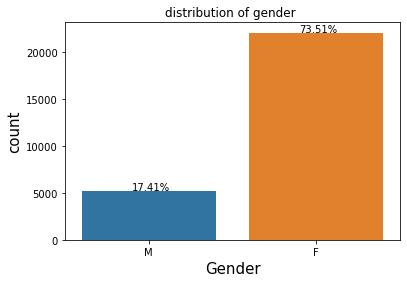

In [6]:
#2. Distribution of the gender of the customers

sns.countplot(data=raw_data,x='Gender')
plt.title('distribution of gender ')
plt.xlabel('Gender',fontsize=15)
plt.ylabel('count',fontsize=15)
# to showpercent on top of bar
# x and y gives the position of text
# s is the text
plt.text(x=-0.1,y=raw_data.Gender.value_counts()[1]+ 20, s=str(round((raw_data.Gender.value_counts()[1])*100/len(raw_data.Gender),2)) + '%')
plt.text(x=0.9,y=raw_data.Gender.value_counts()[0]+ 20, s=str(round((raw_data.Gender.value_counts()[0])*100/len(raw_data.Gender),2)) + '%')
plt.show()

In [7]:
y=raw_data.Gender.value_counts()
y[0]

22054

# 3.3 Statistical Summary

In [8]:
raw_data.describe()

,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,4.169800,0.267433,0.252333,0.222933,0.161333,0.143533,0.139767,0.106933,0.111433,0.094267,...,0.102533,0.271133,0.370067,0.158967,0.077667,0.057333,0.192200,0.116367,0.088033,0.070900
std,3.590311,0.804778,0.705368,0.917494,0.740038,0.641258,0.525840,0.515921,0.547990,0.531592,...,0.486376,0.714682,0.758465,0.510527,0.383370,0.300082,0.641306,0.446578,0.399277,0.387915
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,12.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.000000,9.000000,16.000000,15.000000,...,19.000000,12.000000,11.000000,8.000000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


average no of orders placed by customers is 4

In [9]:
raw_data.describe(include='object')

,Gender
count,27276
unique,2
top,F
freq,22054


# 3.4 Missing Data Treatment

In [ ]:
total= raw_data.isnull().sum().sort_values(ascending=False)
percent=(raw_data.isnull().sum()/raw_data.isnull().count()*100).sort_values(ascending=False)
missing_data=pd.concat([total,percent],axis=1,keys=['Total','Percent'])

In [ ]:
missing_data

In [ ]:
sns.heatmap(raw_data.isnull(),cbar=False)
plt.title('heatmap for missing values')

Replace missig value sin gender by performing dummy encoding

In [3]:
data=pd.get_dummies(raw_data,columns=["Gender"])

In [ ]:
data.head()

In [ ]:
data.shape

In [ ]:
data.isnull().sum()

# 3.5 Visualization

In [ ]:
fig=data.hist(figsize=(18,18))

# 4. K Means Clustering

In [4]:
# we cosider only the brand names to segment the customers . Thus, drop the variables order and genders  the scale the remaining vriables

feature=data.drop(['Orders','Gender_F','Gender_M'],axis=1)
feature.head()

,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
Cust_ID,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [5]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler().fit(feature)
feature=scale.transform(feature)

In [6]:
feature_scaled=pd.DataFrame(feature,columns=data.columns[1:36])
feature_scaled.head()

,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,-0.332312,-0.357739,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,3.446412,-0.177332,-0.297352,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
1,-0.332312,1.059984,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,...,-0.210814,1.019864,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
2,-0.332312,1.059984,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,1.978708,-0.220486,-0.182775
3,-0.332312,-0.357739,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
4,-0.332312,-0.357739,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,...,-0.210814,-0.379382,2.149024,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,2.284083,2.395151


# Build a Model with multiple K

In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
n_clusters=[4,5,6,7,8]
for k in n_clusters:
    cluster=KMeans(n_clusters=k,random_state=10)
    predict=cluster.fit_predict(feature_scaled)
    
    score=silhouette_score(feature_scaled,predict,random_state=10)
    print ("For n_clusters = {}, silhouette score is {})".format(k, score))

For n_clusters = 4, silhouette score is 0.28882936660558056)
For n_clusters = 5, silhouette score is 0.27345077326493045)
For n_clusters = 6, silhouette score is 0.21945733520641614)
For n_clusters = 7, silhouette score is 0.20381188273552986)
For n_clusters = 8, silhouette score is 0.19969011593446037)


In [8]:
# building k means model for k =4
model=KMeans(n_clusters=4,random_state=10)
model.fit(feature_scaled)

KMeans(n_clusters=4, random_state=10)

# 5. Retrive the Clusters

In [9]:
data_output=data.copy(deep=True)
data_output['cluster']=model.labels_
# model.labels_ give the cluster number in which customers belongs


In [10]:
data_output.head()


,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,...,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Gender_F,Gender_M,cluster
Cust_ID,,,,,,,,,,,,,,,,,,,,,
1,7,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,1,1
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,2
3,7,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
5,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0


In [46]:
# check the size of each cluster
np.unique(model.labels_,return_counts=True)

(array([0, 1, 2, 3]), array([ 1255, 22772,  5272,   701], dtype=int64))

Text(2.85, 2000, '701')

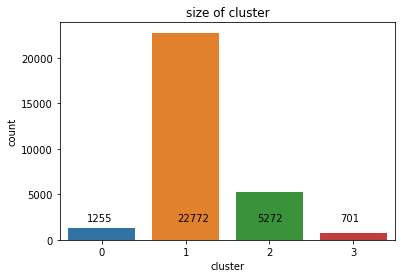

In [27]:
#plot a barplot to visualise the cluster size
sns.countplot(data=data_output,x='cluster')
plt.title('size of cluster')
plt.text(x=-.18,y=2000,s=np.unique(model.labels_,return_counts=True)[1][0])
plt.text(x=.9,y=2000,s=np.unique(model.labels_,return_counts=True)[1][1])
plt.text(x=1.85,y=2000,s=np.unique(model.labels_,return_counts=True)[1][2])
plt.text(x=2.85,y=2000,s=np.unique(model.labels_,return_counts=True)[1][3])

# Cluster Centers
the cluster center gives informaion about the the variables belonging to the clusters

In [11]:
center=pd.DataFrame(model.cluster_centers_,columns=data_output.columns[1:36])
center.head()
# model.cluster_centers return coordinates of cluster centers
center.iloc[1,:]

Jordan                   -0.158476
Gatorade                 -0.157536
Samsung                  -0.084381
Asus                     -0.116934
Udis                     -0.121153
Mondelez International   -0.087155
Wrangler                 -0.113422
Vans                     -0.076786
Fila                     -0.039016
Brooks                   -0.123452
H&M                      -0.158799
Dairy Queen              -0.091024
Fendi                    -0.068992
Hewlett Packard          -0.055305
Pladis                   -0.123492
Asics                    -0.120399
Siemens                  -0.114161
J.M. Smucker             -0.112618
Pop Chips                -0.095141
Juniper                  -0.087916
Huawei                   -0.126187
Compaq                   -0.056312
IBM                      -0.017300
Burberry                 -0.185835
Mi                       -0.094772
LG                       -0.088160
Dior                     -0.161581
Scabal                   -0.191656
Tommy Hilfiger      

# 6. Cluster Analysis

6.1 Analysis of cluster_1
 1. check the size of cluster
 2. sort the variables belonging to the cluster
 3. commputate the statiscal summury for observation in the cluster

In [12]:
# sort the variables
cluster_1=sorted(zip(list(center.iloc[0,:]),list(center.columns)),reverse=True)[:10]
cluster_1


[(2.5683633928700105, 'Pladis'),
 (2.5566711435400604, 'Burberry'),
 (1.9227024096897445, 'Kraft'),
 (1.9073294208644709, 'Dairy Queen'),
 (1.5756195455231812, 'Jiffy mix'),
 (1.3963507697171846, 'LG'),
 (1.3913445112503917, 'Colavita'),
 (1.386412121421779, 'Pop Chips'),
 (1.2075350473368507, 'J.M. Smucker'),
 (1.1370303957637187, 'Tommy Hilfiger')]

1. check the size of cluster_1

In [14]:
raw_data.columns

Index(['Gender', 'Orders', 'Jordan', 'Gatorade', 'Samsung', 'Asus', 'Udis',
       'Mondelez International', 'Wrangler', 'Vans', 'Fila', 'Brooks', 'H&M',
       'Dairy Queen', 'Fendi', 'Hewlett Packard', 'Pladis', 'Asics', 'Siemens',
       'J.M. Smucker', 'Pop Chips', 'Juniper', 'Huawei', 'Compaq', 'IBM',
       'Burberry', 'Mi', 'LG', 'Dior', 'Scabal', 'Tommy Hilfiger', 'Hollister',
       'Forever 21', 'Colavita', 'Microsoft', 'Jiffy mix', 'Kraft'],
      dtype='object')

In [15]:
np.unique(model.labels_,return_counts=True)[1][0]

1255

2. sort the variables 

In [16]:
cluster_1_var=pd.DataFrame(cluster_1)[1]
cluster_1_var


0            Pladis
1          Burberry
2             Kraft
3       Dairy Queen
4         Jiffy mix
5                LG
6          Colavita
7         Pop Chips
8      J.M. Smucker
9    Tommy Hilfiger
Name: 1, dtype: object

3. statistical summary

In [17]:
data_output[['Orders','Gender_F','Gender_M','cluster']][data_output.cluster==0].describe()

,Orders,Gender_F,Gender_M,cluster
count,1255.000000,1255.000000,1255.000000,1255.0
mean,4.146614,0.821514,0.120319,0.0
std,3.630131,0.383074,0.325464,0.0
min,0.000000,0.000000,0.000000,0.0
25%,1.000000,1.000000,0.000000,0.0
50%,4.000000,1.000000,0.000000,0.0
75%,7.000000,1.000000,0.000000,0.0
max,12.000000,1.000000,1.000000,0.0


# 2.Analysis of cluster_2

In [18]:
cluster_2=sorted(zip(list(center.iloc[1,:]),list(center.columns)),reverse=True)[:10]
cluster_2

[(-0.017300283220996953, 'IBM'),
 (-0.039016453563065864, 'Fila'),
 (-0.055304851992885415, 'Hewlett Packard'),
 (-0.05631154842238571, 'Compaq'),
 (-0.06899225921253152, 'Fendi'),
 (-0.06899895112800278, 'Microsoft'),
 (-0.07649272672740089, 'Colavita'),
 (-0.07678611218727988, 'Vans'),
 (-0.0793211322486073, 'Jiffy mix'),
 (-0.0827404232942237, 'Kraft')]

In [19]:
#1. size
np.unique(model.labels_,return_counts=True)[1][1]

22772

In [20]:
# 2. sort
cluster_2_var=pd.DataFrame(cluster_2)[1]
cluster_2_var


0                IBM
1               Fila
2    Hewlett Packard
3             Compaq
4              Fendi
5          Microsoft
6           Colavita
7               Vans
8          Jiffy mix
9              Kraft
Name: 1, dtype: object

In [21]:
# statistical
data_output[['Orders','Gender_F','Gender_M','cluster']][data_output.cluster==1].describe()

,Orders,Gender_F,Gender_M,cluster
count,22772.000000,22772.000000,22772.000000,22772.0
mean,4.096829,0.705691,0.195547,1.0
std,3.606516,0.455741,0.396630,0.0
min,0.000000,0.000000,0.000000,1.0
25%,0.000000,0.000000,0.000000,1.0
50%,4.000000,1.000000,0.000000,1.0
75%,7.000000,1.000000,0.000000,1.0
max,12.000000,1.000000,1.000000,1.0


# 3. Analysis of cluster_3

In [22]:
cluster_3=sorted(zip(list(center.iloc[2,:]),list(center.columns)),reverse=True)[:10]
cluster_3

[(0.7701757489709875, 'Scabal'),
 (0.5948559923975838, 'Jordan'),
 (0.5869420849637211, 'Hollister'),
 (0.569990152420094, 'Gatorade'),
 (0.5655013593708226, 'Dior'),
 (0.5438465382729086, 'H&M'),
 (0.5358397875071584, 'Forever 21'),
 (0.5113016084652853, 'Udis'),
 (0.5044601305847976, 'Huawei'),
 (0.47445917154291106, 'Asus')]

In [23]:
#1. size
np.unique(model.labels_,return_counts=True)[1][2]

5272

In [24]:
#2.sort
cluster_3_var=pd.DataFrame(cluster_3)[1]
cluster_3_var


0        Scabal
1        Jordan
2     Hollister
3      Gatorade
4          Dior
5           H&M
6    Forever 21
7          Udis
8        Huawei
9          Asus
Name: 1, dtype: object

In [25]:
#3. satstitical
data_output[['Orders','Gender_F','Gender_M','cluster']][data_output.cluster==2].describe()

,Orders,Gender_F,Gender_M,cluster
count,5272.000000,5272.000000,5272.000000,5272.0
mean,4.459598,0.845220,0.089340,2.0
std,3.503566,0.361729,0.285261,0.0
min,0.000000,0.000000,0.000000,2.0
25%,1.000000,1.000000,0.000000,2.0
50%,4.000000,1.000000,0.000000,2.0
75%,7.000000,1.000000,0.000000,2.0
max,12.000000,1.000000,1.000000,2.0


# 4. Analysis of cluster_4

In [26]:
cluster_4=sorted(zip(list(center.iloc[3,:]),list(center.columns)),reverse=True)[:10]
cluster_4

[(4.612421213336685, 'Siemens'),
 (3.757106120080624, 'Asics'),
 (0.37624191651627764, 'J.M. Smucker'),
 (0.11864320568860037, 'Pop Chips'),
 (0.06776496739127584, 'Juniper'),
 (0.06414297821158883, 'Huawei'),
 (0.04153395009907408, 'Mi'),
 (0.030422522349300627, 'Compaq'),
 (0.013628487938845111, 'Mondelez International'),
 (0.01094716225040174, 'Microsoft')]

In [27]:
#1. size
np.unique(model.labels_,return_counts=True)[1][3]

701

In [28]:
#2.sort
cluster_4_var=pd.DataFrame(cluster_4)[1]
cluster_4_var


0                   Siemens
1                     Asics
2              J.M. Smucker
3                 Pop Chips
4                   Juniper
5                    Huawei
6                        Mi
7                    Compaq
8    Mondelez International
9                 Microsoft
Name: 1, dtype: object

In [ ]:
#3. satstitical
data_output[['Orders','Gender_F','Gender_M','cluster']][data_output.cluster==3].describe()

# Conclusion

In this case study , we have grouped the customers dataset into 4 clusters based on the brands they have searched on e-commerece sites. we have used the silhouette score method to find the optimum number of clusters and decided k=4 as the best pick after analysing the silhouette score .

After applying the K-means algorithms with an 4 number of clusters , we segmented the customers under 'Grocery','Appearls','Electronics'and 'Basket class' categories. These clusters give the information about the interest of the customer in the different brands. This type of segmentation can help the e-commerce companies , to know the customer choices and they can provide more accurate recommendation to the customers. 